In [2]:
from typing import Tuple
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from colors import final_color, cv_color
from constants import KINGDOMS
from evaluation.serialization import Serializer

In [5]:
cv_final_metrics = Serializer.load("cv_metrics").query("label != 'overall'")
final_metrics = Serializer.load("final_metrics").query("label != 'overall'").query("label != 'overall'")

# Preserve label order
final_metrics["label"] = pd.Categorical(final_metrics["label"], [c for c in "STLIMO"])
cv_final_metrics["label"] = pd.Categorical(cv_final_metrics["label"], [c for c in "STLIMO"])

In [10]:
final_data = final_metrics\
    .query("kingdom == 'overall' and label != 'overall'")\
    .groupby(["metric", "kingdom", "label"])\
    .agg(["mean", "std"])\
    ["value"]

In [11]:
cv_average_data = cv_final_metrics\
    .query("kingdom == 'overall' and label != 'overall'")\
    .groupby(["metric", "kingdom", "label"])\
    .agg(["mean", "std"])\
    ["value"]

In [20]:
cv_average_data.query(f"label == 'M'")["mean"]

metric     kingdom  label
mcc        overall  M        0.759335
precision  overall  M        0.759609
recall     overall  M        0.771728
Name: mean, dtype: float64

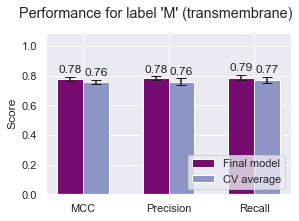

In [38]:
sns.set_theme()
matplotlib.rcParams.update({"errorbar.capsize": 5})

bar_width = 0.3
metrics = ["mcc", "precision", "recall"]
labels = ["MCC", "Precision", "Recall"]
r1 = np.arange(len(metrics))
r2 = r1 + bar_width

final_values = plt.bar(
    r1,
    final_data.query(f"label == 'M'")["mean"],
    yerr=final_data.query(f"label == 'M'")["std"],
    width=bar_width,
    color=final_color,
    label="Final model"
)

cv_values = plt.bar(
    r2,
    cv_average_data.query(f"label == 'M'")["mean"],
    yerr=cv_average_data.query(f"label == 'M'")["std"],
    width=bar_width,
    color=cv_color,
    label="CV average"
)

plt.gca().set_ylabel("Score")
plt.gca().set_xticks(r1 + bar_width/2)
plt.gca().set_xticklabels(labels)
plt.gca().set_ylim([0.0, 1.09])
plt.suptitle("Performance for label 'M' (transmembrane)")

plt.bar_label(final_values, padding=2, fmt="%.2f")
plt.bar_label(cv_values, padding=2, fmt="%.2f")

plt.legend(loc="lower right")
plt.tight_layout()
plt.gcf().set_size_inches(4, 3)
plt.gcf().savefig("output/transmembrane_performance.png", dpi=240)